✅ Loaded 196 feedback rows
📊 Train: 156 | Test: 40

📈 Classification Report:

              precision    recall  f1-score   support

         neg      0.550     0.647     0.595        17
         neu      0.600     0.667     0.632        18
         pos      0.000     0.000     0.000         5

    accuracy                          0.575        40
   macro avg      0.383     0.438     0.409        40
weighted avg      0.504     0.575     0.537        40



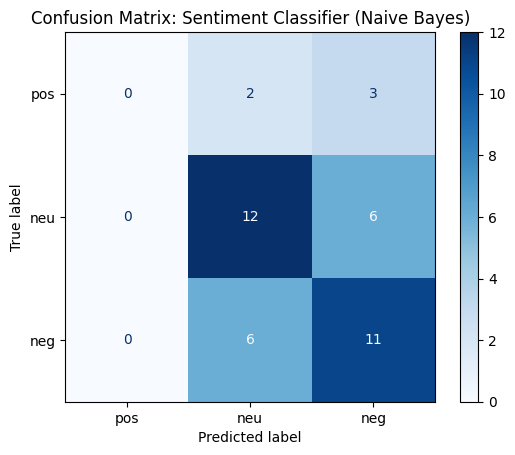

💾 Model and vectorizer saved to ../models/


In [6]:
# ============================
#  DAY 8: Sentiment Model (Naive Bayes)
# ============================

# STEP 1: Import
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt

# STEP 2: Load processed sentiment dataset
df = pd.read_csv("../data/processed/feedback_sentiment.csv")
print(f"✅ Loaded {len(df)} feedback rows")

# Keep only text + label
df = df[["comment", "sentiment"]].dropna()

# STEP 3: Tokenize (Thai)
def tokenize_thai(text):
    return " ".join(word_tokenize(str(text), keep_whitespace=False))

df["clean_comment"] = df["comment"].apply(tokenize_thai)

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_comment"], df["sentiment"], test_size=0.2, random_state=42, stratify=df["sentiment"]
)

print(f"📊 Train: {len(X_train)} | Test: {len(X_test)}")

# STEP 5: TF-IDF Vectorizer
vectorizer = TfidfVectorizer(
    max_features=1500,
    sublinear_tf=True,
    ngram_range=(1, 2),  # include unigram + bigram
)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# STEP 6: Train model (Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# STEP 7: Evaluate
y_pred = model.predict(X_test_vec)
print("\n📈 Classification Report:\n")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))

# STEP 8: Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=["pos", "neu", "neg"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["pos", "neu", "neg"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Sentiment Classifier (Naive Bayes)")
plt.show()

# STEP 9: Save model & vectorizer (optional)
import os, joblib

os.makedirs("../models", exist_ok=True)

joblib.dump(model, "../models/sentiment_nb.pkl")
joblib.dump(vectorizer, "../models/tfidf_vectorizer.pkl")
print("💾 Model and vectorizer saved to ../models/")
